In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plot style
sns.set_style("darkgrid")


In [2]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()  # this will open a file chooser dialog

# Read CSV into pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Uploaded file: {filename}")

# Show first 5 rows
df.head()

Saving game_data.csv to game_data (1).csv
Uploaded file: game_data (1).csv


,Category,Metric,Value
0,Player Stats,Bullets Fired,343
1,Player Stats,Hits,109
2,Player Stats,Lives Lost,2
3,Enemy Stats,Enemies Spawned,134
4,Enemy Stats,Enemies Destroyed,109


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  9 non-null      object
 1   Metric    9 non-null      object
 2   Value     9 non-null      object
dtypes: object(3)
memory usage: 348.0+ bytes


,Category,Metric,Value
count,9,9,9
unique,3,9,7
top,Player Stats,Bullets Fired,109
freq,3,1,3


In [4]:
df.isnull().sum()


,0
Category,0
Metric,0
Value,0


Time Played (sec): 78.83
Enemies Spawned: 134.0
Enemies Destroyed: 109.0
Enemies Reached Bottom: 20.0


/tmp/ipython-input-2931504358.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Count', data=enemy_metrics, palette='viridis')


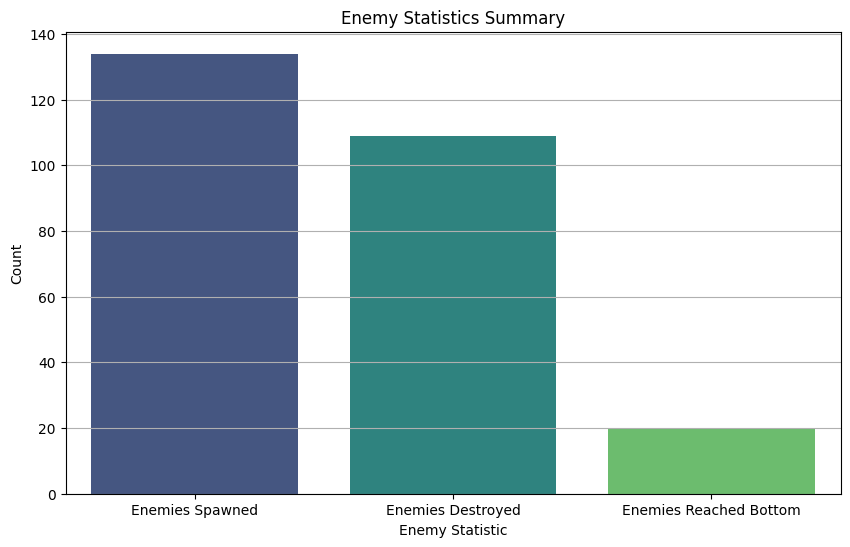

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#enemy stats analysis

# Ensure 'Value_numeric' column is available for calculations
df['Value_numeric'] = pd.to_numeric(df['Value'], errors='coerce')

# Extract relevant enemy stats
enemies_spawned = df[df['Metric'] == 'Enemies Spawned']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Enemies Spawned'].empty else None
enemies_destroyed = df[df['Metric'] == 'Enemies Destroyed']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Enemies Destroyed'].empty else None
enemies_reached_bottom = df[df['Metric'] == 'Enemies Reached Bottom']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Enemies Reached Bottom'].empty else None

# Extract Time Played (sec) if needed, though a line plot over time isn't suitable for single points
time_played_sec = df[df['Metric'] == 'Time Played (sec)']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Time Played (sec)'].empty else None

if all(v is not None for v in [enemies_spawned, enemies_destroyed, enemies_reached_bottom]):
    print(f"Time Played (sec): {time_played_sec}")
    print(f"Enemies Spawned: {enemies_spawned}")
    print(f"Enemies Destroyed: {enemies_destroyed}")
    print(f"Enemies Reached Bottom: {enemies_reached_bottom}")

    # Create a DataFrame for plotting these specific enemy metrics
    enemy_metrics = pd.DataFrame({
        'Metric': ['Enemies Spawned', 'Enemies Destroyed', 'Enemies Reached Bottom'],
        'Count': [enemies_spawned, enemies_destroyed, enemies_reached_bottom]
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Count', data=enemy_metrics, palette='viridis')
    plt.xlabel('Enemy Statistic')
    plt.ylabel('Count')
    plt.title('Enemy Statistics Summary')
    plt.grid(axis='y')
    plt.show()
else:
    print("Could not find all required enemy statistics in the DataFrame for plotting.")

# Note: Removed the line plot as it's not applicable for single data points in a 'time series' context.

In [8]:
#summary stats per session

# Ensure 'Value_numeric' column is available for calculations
df['Value_numeric'] = pd.to_numeric(df['Value'], errors='coerce')

# Extract relevant metric values
final_score = df[df['Metric'] == 'Final Score']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Final Score'].empty else None
bullets_fired = df[df['Metric'] == 'Bullets Fired']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Bullets Fired'].empty else None
hits = df[df['Metric'] == 'Hits']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Hits'].empty else None
enemies_destroyed = df[df['Metric'] == 'Enemies Destroyed']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Enemies Destroyed'].empty else None
enemies_reached_bottom = df[df['Metric'] == 'Enemies Reached Bottom']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Enemies Reached Bottom'].empty else None

# Calculate accuracy if both hits and bullets fired are available and bullets_fired > 0
accuracy = (hits / bullets_fired) * 100 if hits is not None and bullets_fired is not None and bullets_fired > 0 else 0

print("--- Summary Statistics ---")
if final_score is not None:    print(f"Final Score: {final_score}")
if bullets_fired is not None: print(f"Total Bullets Fired: {bullets_fired}")
if hits is not None:          print(f"Total Hits: {hits}")
if enemies_destroyed is not None: print(f"Total Enemies Destroyed: {enemies_destroyed}")
if enemies_reached_bottom is not None: print(f"Total Enemies Reached Bottom: {enemies_reached_bottom}")
print(f"Player Accuracy: {accuracy:.2f}%")


--- Summary Statistics ---
Final Score: 109.0
Total Bullets Fired: 343.0
Total Hits: 109.0
Total Enemies Destroyed: 109.0
Total Enemies Reached Bottom: 20.0
Player Accuracy: 31.78%


In [9]:
# 12) Save personal output and provide download link
out_name = "sibte_analysis.csv"
df.to_csv(out_name, index=False)
from google.colab import files
files.download(out_name)
print(f"\nSaved and started download: {out_name}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saved and started download: sibte_analysis.csv
